# Idealised disc galaxy

This tutorial will take you through the process of generating idealised disc simulations:

- generation of initial conditions with **DICE**

- running different flavours of RAMSES (HD, RT)

- using different star formation and feedback (SN, AGN) subgrid models

Through the tutorial, you will learn how to adapt the **Makefile** depending on the physical modules included, and how to adapt the **namelist** accordingly, using meaningful values for the parameters of the subgrid models. Finally, you will also learn how to use **yt** and **ffmpeg** to visualize the RAMSES outputs.

## 1. Prerequisites

- a `fortran compiler` to compile RAMSES

- some version of `MPI` to run RAMSES in parallel

- `python3` in a `Jupyter notebook`, including the following packages :`numpy`, `astropy`, `matplotlib`

### Specific modules, codes and packages needed for this tutorial

- `DICE`

- a `C compiler`, `GSL` and `FFTW3` to compile and use DICE

- `yt`

- `ffmpeg`

Please refer to the [Instructions to get started on the CBP machine](https://ramses-tutorials.readthedocs.io/en/latest/Setup/CBP.html) or [Instructions to get started on your laptop](https://ramses-tutorials.readthedocs.io/en/latest/Setup/laptop.html) section according to your needs, and make sure that you load the modules needed on the machine you are using before going forward (namely GSL, fftw, and fortran and C compilers with e.g. GCC).

### 1.1 RAMSES

To get the RAMSES code, open a terminal, go into the tutorial folder and clone the code with the following commands:

```bash
cd ramses-tutorials/Idealised-Disc-Galaxy/
git clone https://github.com/ramses-organisation/ramses
```

### 1.2 DICE

In this tutorial, we will use the [DICE](https://bitbucket.org/vperret/dice/src/master/) initial conditions generator to create galaxy disk initial conditions (ICs). You can directly go to the "Compile & install section" of the [DICE instructions webpage](https://bitbucket.org/vperret/dice/wiki/Compile%20&%20Install), or simply follow the instructions below:

```bash
git clone https://bitbucket.org/vperret/dice
cd dice
mkdir build
cd build
cmake ..
make
make install
```
If you encounter any problem, please refer to the [DICE instructions for installation](https://bitbucket.org/vperret/dice/wiki/Compile%20&%20Install). Depending on your C compiler version, you may need the following 'extra' parameters with cmake when installing: `cmake .. -DCMAKE_C_FLAGS="-fcommon"`. With recent versions of CMake, it can happen that the installer complains, in which case you can follow the suggested solution and add `-DCMAKE_POLICY_VERSION_MINIMUM=3.5` to the `cmake` call.

After installation, you should obtain a `dice` directory which contains the executable in `dice/build/bin/dice`.

### 1.3 The yt project

[yt](https://yt-project.org) is an open-source python package that we will use for analyzing and visualizing RAMSES data (it is also compatible with data from other astrophysical codes). If you have followed the [General setup requirements](https://ramses-tutorials.readthedocs.io/en/latest/Setup/general_requirements.html) section from the tutorial, yt should already be installed. Otherwise, we recommend the use of conda to download and install yt:

```bash
conda install -c conda-forge yt
```

(Alternatively, you may also use pip with the command: `python -m pip install --user yt`)


### 1.4 FFMPEG

[ffmpeg](https://www.ffmpeg.org) will be used for processing and assembling images into a movie. To download and install ffmpeg, you can use a package manager such as `sudo apt install ffmpeg`, or do as follows:

  ```bash
  git clone https://git.ffmpeg.org/ffmpeg.git ffmpeg
  cd ffmpeg
  ./configure
  make
  make install
  ```

## 2. Running RAMSES with DICE ICs

### 2.1 Running DICE to create the ICs

Using the DICE executable, you can now run DICE with the dwarf galaxy configuration files found in `ramses-tutorials/Idealised-Disc-Galaxy/ICs/dwarf_galaxy/`. This generates ICs that RAMSES can read to run a simulation of an isolated galaxy. The RAMSES namelist needs to know where the ICs are stored, so we will generate the ICs into that same sub-subfolder with (it should take ~2 min.): 

```bash
cd ICs/dwarf_galaxy
/path/to/dice/build/bin/dice dwarf_galaxy.config
```

You should now have 6 additional files in that folder: `dwarf_galaxy.params.rzN` (N=1-5) and `dwarf_galaxy.g2`. Each `dwarf_galaxy.params.rzN` includes the properties of one of the 5 galaxy components (halo, stellar disk, gaseous disk, stellar bulge and stellar spheroid, see details in dwarf_galaxy.params). `dwarf_galaxy.g2` is a binary file, that corresponds to the ICs used by RAMSES to run the simulation of this dwarf galaxy.

We will now run and analyze a RAMSES simulation with this fiducial dwarf galaxy. Later on, feel free to play with the DICE parameter files (.config and .params) to generate your own galaxy ICs with different properties (e.g. halo and stellar mass, gas to stellar mass fraction, disc thickness etc.). You can also later use DICE to set up RAMSES runs for idealised galaxy mergers.

### 2.2 Running RAMSES to get an isolated galaxy simulation

For running with the DICE ICs, RAMSES needs to be compiled with the DICE patch. For this, go to the directory in which you cloned RAMSES and type: 

```bash
cd ramses/bin
make clean
make NDIM=3 MPI=1 PATCH=../patch/init/dice/ EXEC=ramses-dice
```

Note that after the code has compiled, the executable name is actually `ramses-dice3d`.

We will now run a $~10^{10} \ M_{\odot}$ halo with $~50$ pc resolution, star formation and supernovae feedback (but no radiation), so this simulation takes some time to get to the end goal of $250 \ {\rm Myr}$ of galaxy disk evolution. Still, the first outputs will be written shortly, and you will be able to continue the tutorial while the simulation is running. To start the simulation, go back to the `dwarf_galaxy/` directory, into the sub-directory `dwarf_galaxy_run/` and run RAMSES as follows:
```bash
cd dwarf_galaxy_run
mpirun -np 8 your-path-to-ramses/bin/ramses-dice3d setup.nml > run.log &
```
In this example we are using 8 cores, you might need to use less if you are running this locally, and you should use more if you have access to more. 
The simulation will eventually return ~50 outputs and two movie directories. Also, the command is run in the background (with `&`). Should you want to stop the simulation, type `fg` in the terminal, which will bring back the run to the foreground, and use `ctrl-C`. 

You can check the evolution of the simulation through the log file as the run progresses, for example with (type `ctrl-C` to stop):

```bash
tail -f run.log
```

Congratulations, you just made a RAMSES idealised galaxy simulation! You can then play with increasing the resolution, using more sophisticated models for star formation or feedback in your namelist file (`setup.nml`), and this tutorial will show you some examples of how to do so. 

For descriptions of the available parameters, see the [RAMSES documentation](https://ramses-organisation.readthedocs.io/en/latest/). You can also generate different galaxy disk ICs with DICE. Start from the configuration files coming with this tutorial and refer to the DICE documentation for an overview of the parameters and what they do. 

Now that you have a few outputs, we can execute the notebook cells below to do some visualisation.

## 3. Visualizing the outputs

### 3.1 Maps and plots with [yt](https://yt-project.org/)

In [1]:
# Import the relevant modules for reading RAMSES outputs and visualising them
import yt
import numpy as np
from matplotlib import pyplot as plt
yt.set_log_level(0)

In [2]:
# Load RAMSES snapshot with Yt
RHD=False # Set to true if running RAMSES-RT -- this is for later.
snap=9 # Snapshot number to look at -- You need to change this as you get more outputs!!!
snapstr = "%05d" % snap
path='./dwarf_galaxy_run/'
if RHD: path='./dwarf_galaxy_rhd_run/'
ds = yt.load(path+'output_'+snapstr+'/info_'+snapstr+'.txt')

In [3]:
# Show the available variables
#sorted(ds.field_info)

The total gas mass is  139660535.040833 Msun



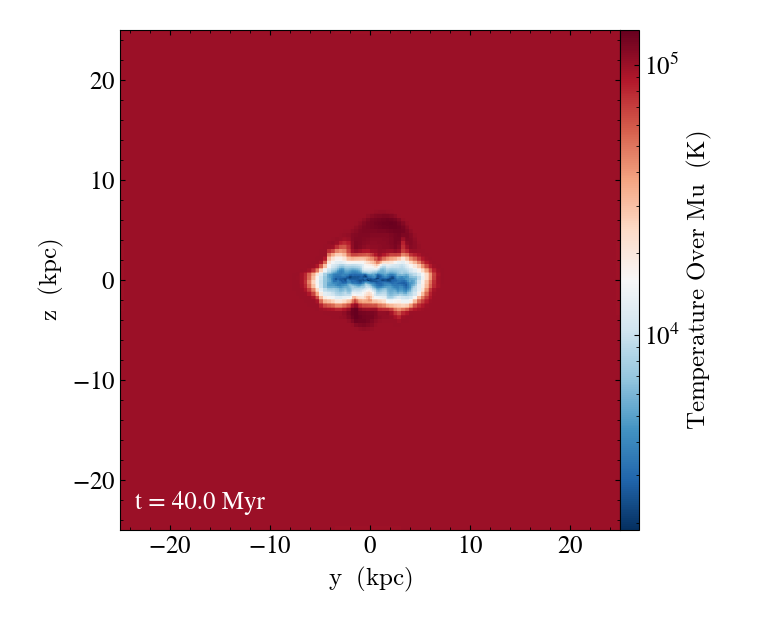


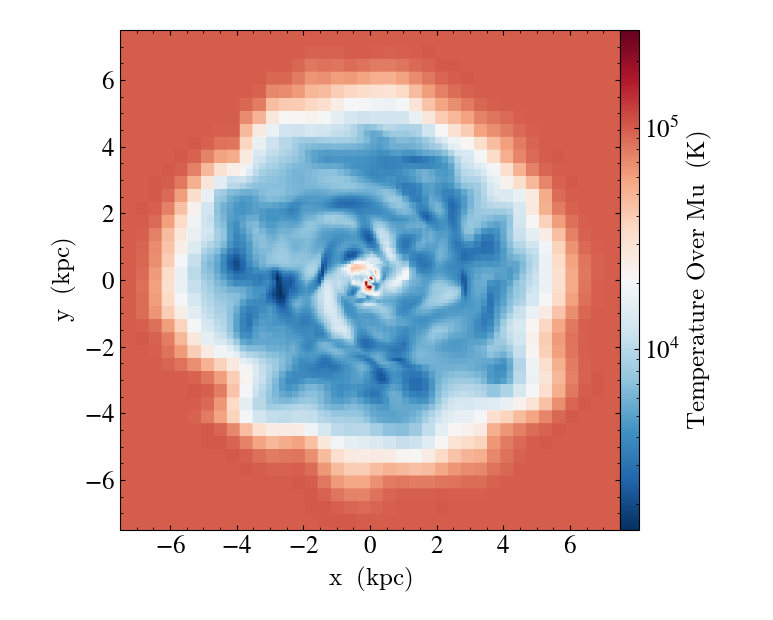


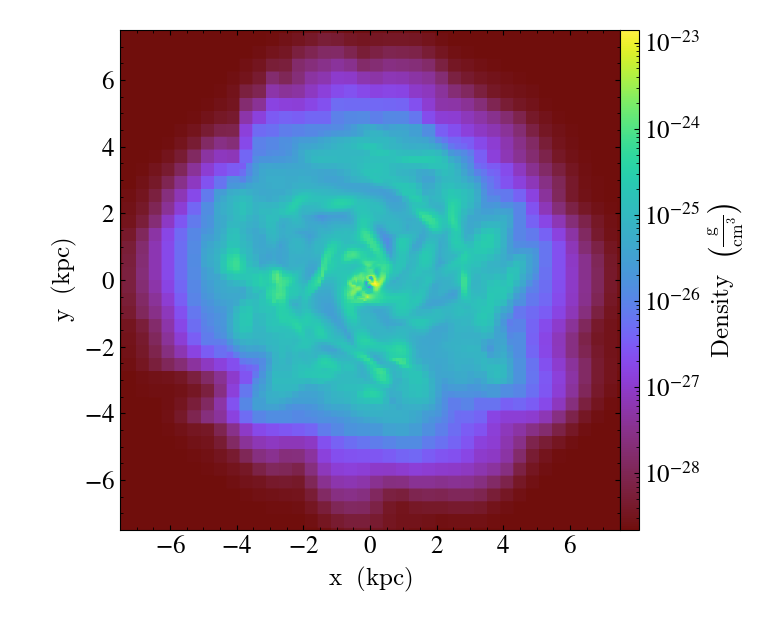


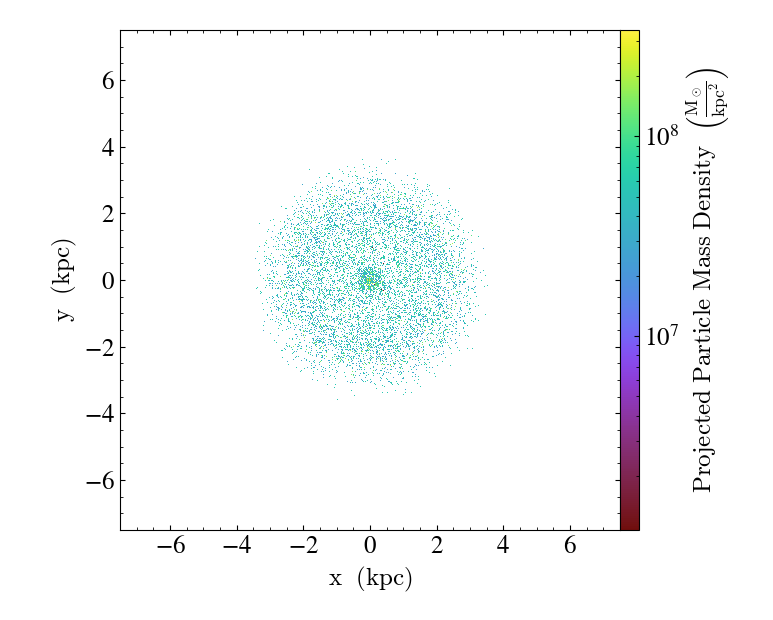

In [4]:
# Show projection maps
ad=ds.all_data()
m_tot = np.sum(ad['density']*ad['dx']**3)
print("The total gas mass is ",m_tot.in_units('Msun'))
time_Myr = ds.current_time.in_units('Myr')

# projection of the full box in temperature, face-on
p = yt.ProjectionPlot(ds, 'x', 'temperature_over_mu',weight_field='density')
p.annotate_timestamp()
p.set_cmap(('temperature_over_mu'), "RdBu_r")
p.set_figure_size(5)
p.show()

# zoomed-in projection of temperature, density, and stars
p = yt.ProjectionPlot(ds, 'z', 'temperature_over_mu',weight_field='density',width=(15,'kpc'))
p.set_cmap(('temperature_over_mu'), "RdBu_r")
p.set_figure_size(5)
p.show()

p = yt.ProjectionPlot(ds,'z', 'density',width=(15,'kpc'), method="max")
p.set_unit('density', 'g/cm**3')
p.set_figure_size(5)
p.show()

p = yt.ParticleProjectionPlot(ds, 2, [("star", "particle_mass")], width=(15,'kpc'), density=True)
p.set_unit(("star", "particle_mass"), "Msun/kpc**2")
p.set_figure_size(5)
p.show()

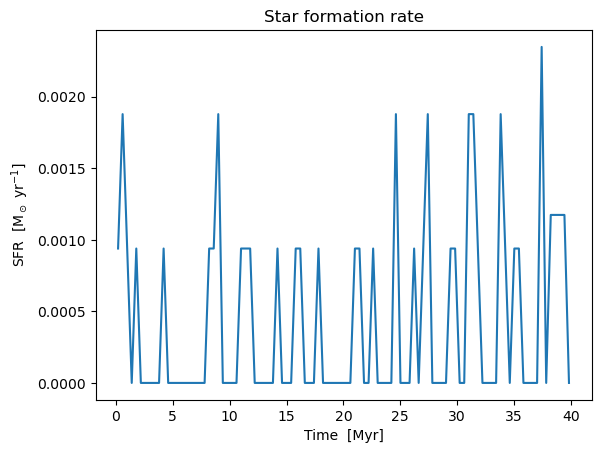

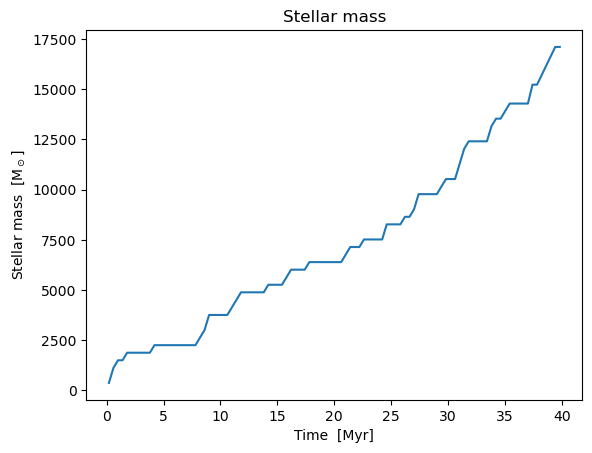

In [5]:
# Plot star formation history.
# You need to use an output with star particles for this to work -> change the value of snap!
plt.ion() # So as to show plots
ad = ds.all_data()
masses = ad['star', 'particle_mass'].in_units('Msun')
formation_time = ad['star', 'particle_birth_time'].in_units('yr')
time_yr = ds.current_time.in_units('yr')
time_range = [-100, time_yr.v] # years
n_bins = 100
hist, bins = np.histogram(formation_time, bins=n_bins, range=time_range,)
inds = np.digitize(formation_time, bins=bins)
time = (bins[:-1] + bins[1:])/2
sfr = np.array([masses[inds == j+1].sum()/(bins[j+1]-bins[j])
                for j in range(len(time))])
mass = np.array([masses[inds == j+1].sum()
                for j in range(len(time))])
mass= np.cumsum(mass)
# SFR plot
plt.plot(time/1e6, sfr)
plt.title('Star formation rate')
plt.xlabel('Time  [Myr]')
plt.ylabel(r'SFR  [M$_\odot$ yr$^{-1}$]')
plt.show()

# Plot of stellar mass formed
fig=plt.figure()
plt.plot(time/1e6, mass)
plt.title('Stellar mass')
plt.xlabel('Time  [Myr]')
plt.ylabel(r'Stellar mass  [M$_\odot$]')
plt.show()

### 3.2 Making movies

The RAMSES simulation namelist contains MOVIE_PARAMS (see also [the documentation](https://ramses-organisation.readthedocs.io/en/latest/wiki/Movies.html) for details), which tells the code to generate binary files with short time intervals showing face-on and edge-on projections of gas density, temperature, and stars.

The first cell below reads those binary files and creates .png images out of them, each with the density, temperature, and stars superimposed.

The second cell then calls ffmpeg to squeeze all those pngs into one .mp4 movie file. For that second cell to work, you need to have ffmpeg installed.

In [ ]:
# Read binary movie frames and make .png images
import os
import glob
import numpy as np
from scipy.io import FortranFile
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

mov_proj = 1 # Movie projection (1=face-on, 2=edge-on)     ####################CHANGE THIS FOR DIFFERENT PROJECTION

plt.ioff() # So as not to show plots
#plt.ion() # So as to show plots
fig = plt.figure(frameon=False)
nx = 500
ny = 500
nypic=ny  #int(ny*0.6)
plt.subplots_adjust(left=0., bottom=0.,
                    right=1.+1.0/nx, top=1.+1.0/nypic,
                    wspace=0., hspace=0.)
fig.set_size_inches(nx/100.*.7,nypic/100.*.7)

#As defined via movie_vars_txt in setup.nml
quants = {
    "temp": {
        "name": "temp",
        "data": np.array([]),
        "min": 1e10,
        "max": -1e10,
    },
    "dens": {
        "name": "dens",
        "data": np.array([]),
        "min": 1e10,
        "max": -1e10,
    },
    "stars": {
        "name": "stars",
        "data": np.array([]),
        "min": 1e10,
        "max": -1e10,
    }
}

if RHD:
    quants.update({
    "Fp1": {
        "name": "Fp1",
        "data": np.array([]),
        "min": 1e10,
        "max": -1e10,
    }}
    )

d_cmap=matplotlib.cm.viridis

cmap = matplotlib.cm.bone
stars_cmap = cmap(np.arange(cmap.N))
stars_cmap[:,-1] = np.linspace(0, 1, cmap.N)
stars_cmap = ListedColormap(stars_cmap)

cmap = matplotlib.cm.RdBu_r
temp_cmap = cmap(np.arange(cmap.N))
temp_cmap[:,-1] = np.linspace(0, 1, cmap.N)
temp_cmap = ListedColormap(temp_cmap)

cmap = matplotlib.cm.cividis
fp_cmap = cmap(np.arange(cmap.N))
fp_cmap[:,-1] = np.linspace(0, 1, cmap.N)
fp_cmap = ListedColormap(fp_cmap)

movie_path = '%s/movie%d/'%(path,mov_proj)
png_dir = '%s/pngs'%(path)
try:
    os.mkdir(png_dir) # Create directory to store movie frames in png files
except FileExistsError:
    do_nothing=True
all_ok = True

# Figure out the number of frames for the movie
searchstring = '%s/info_'%(movie_path)
frames = glob.glob(searchstring+'*') # Frame strings
i_frames = [ int(str[len(searchstring):len(searchstring)+4]) for str in frames ]
i_frames = sorted(i_frames)         # Sort them
imin = i_frames[0]
imax = i_frames[len(i_frames)-1]

# Loop over the movie frames and generate .png images
for i in range(imin,imax+1):
    # Read the info file:
    info = open(f"{movie_path}info_{str(i).zfill(5)}.txt").readlines()
    time_sec=0.0
    time_sec = float(info[8].split("=")[-1].strip())
    unit_l =   float(info[15].split("=")[-1].strip())
    unit_d =   float(info[16].split("=")[-1].strip())
    unit_t =   float(info[17].split("=")[-1].strip())
    time_myr = time_sec*unit_t/3.156e13
    
    # Load in the data
    for q in quants:
        fname = f"{quants[q]['name']}_{str(i).zfill(5)}.map"
        ffile = FortranFile(f"{movie_path}{fname}")
        [time, fdw, fdh, fdd] = ffile.read_reals('d')
        [frame_nx, frame_ny] = ffile.read_ints()
        data = np.array(ffile.read_reals('f4'), dtype=np.float64)
        try: 
            quants[q]["data"] = data.reshape(frame_nx,frame_ny)
            quants[q]["min"] = quants[q]["data"][quants[q]["data"] > 0].min()
            quants[q]["max"] = quants[q]["data"][quants[q]["data"] > 0].max()
            quants[q]["data"][quants[q]["data"] < quants[q]["min"]] = 1e-5 * quants[q]["min"]
        except ValueError:
            all_ok = False
        f, axs = plt.subplots(1,1,figsize=(7.5,7.5),sharex=True,sharey=True)
    plt.subplots_adjust(left=0, right=1.0, top=1.0, bottom=0)
    axs.imshow(np.log10(quants["dens"]["data"]),vmin=-6,vmax=2,cmap=d_cmap,aspect='auto',interpolation='none')
    if RHD:
        axs.imshow(np.log10(quants["Fp1"]["data"]),vmin=-6,vmax=2,cmap=fp_cmap,aspect='auto',alpha=0.5)
    else:
        axs.imshow(np.log10(quants["temp"]["data"]),vmin=4.5,vmax=6.5,cmap=temp_cmap)
        axs.imshow(np.log10(quants["stars"]["data"]),vmin=-5,vmax=-2,cmap=stars_cmap,alpha=0.5)
    plt.axis("off")
    # Text showing simulation time
    axs.text(0.97, 0.03,'%.2f Myr'%(time_myr), fontsize=15,transform=axs.transAxes
             , verticalalignment='bottom', horizontalalignment='right', color='white')
    # Bar showing length scale
    frame_width_kpc = fdw*unit_l/3.08e21
    rect = mpatches.Rectangle((0.055,0.03),10./frame_width_kpc,0.002,color='white',transform=axs.transAxes)
    axs.add_patch(rect)
    axs.text(0.055, 0.01+15./frame_ny, ('%d kpc'%(10)),
            verticalalignment='bottom', horizontalalignment='left',
            transform=axs.transAxes, color='white', fontsize=15. )
   
    # Store frame in png file
    filename = '%s/frame_%d_%05d.png'%(png_dir,mov_proj,i)
    print(filename)
    f.savefig(filename, dpi=100)

In [ ]:
# Run ffmpeg to make a .mp4 out of the .png frames
import subprocess
movie_filename = '%smovie%d.mp4'%(path,mov_proj)
frames = '%spngs/frame_%d_%%*.png'%(path,mov_proj)
fps=50.
speed=60.
quality=23
print("Calling ffmpeg! Output: {mov}".format(mov=movie_filename))
print("{binffmpeg} -i {input}\
                     -y -vcodec h264 -pix_fmt yuv420p\
                     -r {fps} -filter:v 'setpts={speed}*PTS'\
                     -crf {quality} {output}".
                    format(binffmpeg='ffmpeg', input=frames,
                           fps=fps, speed=speed/fps,
                           quality=quality, output=movie_filename))
subprocess.call("{binffmpeg} -i {input}\
                     -y -vcodec h264 -pix_fmt yuv420p\
                     -r {fps} -filter:v 'setpts={speed}*PTS'\
                     -crf {quality} {output}".
                    format(binffmpeg='ffmpeg', input=frames,
                           fps=fps, speed=60./fps,
                           quality=quality, output=movie_filename), shell=True)
print('####################################################################')
print('-----------Your new movie is here: ', movie_filename)
print('####################################################################')

## 4. Let's play with RAMSES!

### 4.1 RHD run
Now you can do the same run with radiation-hydrodynamics (RHD) and include ionising radiation from stars. 

Let's take a moment to compare the setup of the RHD (`dwarf_galaxy_rhd_run/`) to the previous, purely hydro simulation (`dwarf_galaxy_run/`). Every RAMSES simulation has a namelist, here called `setup.nml`, which lists a number of parameters and their value. For more details about how the namelist works, see also [the RAMSES documentation here](https://ramses-organisation.readthedocs.io/en/latest/wiki/Runtime_Parameters.html).   

In order to include radiative transfer (RT), we need to turn on radiative transfer by adapting the namelist with `rt=.true.` in the `&RUN_PARAMS` section. To enable the emission of radiation from the stars, it is needed to set `rt_star=.true.` and to include the path of a spectral energy distribution (SED) model in `sed_dir`, in the `RT_PARAMS` section. 


The first step is to download and extract the SED files

In [ ]:
%%bash
wget https://ramses.cnrs.fr/wp-content/uploads/2024/11/SED.zip
unzip SED.zip


Here are the parameters we will use, whose values differ from the default setting:

```Fortran
&RUN_PARAMS
rt=.true.                   ! Activate radiative transfer

&RT_PARAMS
rt_output_coolstats=.true.  ! Write thermochemistry statistics to the standard output
rt_star=.true.              ! Release radiation from stars
sedprops_update=5           ! Frequency (per coarse timestep) of photon group updates according to SED model
rt_c_fraction=0.001         ! fraction of actual lightspeed used (reduced for keeping a manageable timestep)
rt_nsubcycle=500            ! Maximum number of RT-steps during one hydro/gravity/etc timestep
sed_dir='../SED/bc03/'   ! Directory containing SED model for the stellar emission
```
One can also change other RT-specific parameters in the `&RT_PARAMS` and `&RT_GROUPS` sections. By default, the code will deal with the HI, HeI and HeII ionizing photon groups, with ionisation cross sections and energies derived from a blackbody spectrum with an effective temperature of $10^5$ K. 

Before running the RHD simulation, you first need to compile RAMSES with the RHD options of three radiation groups and 3 ionisation fractions (xHII, xHeII, and xHeIII): 
```bash
cd ramses/bin
make clean
make NDIM=3 MPI=1 PATCH=../patch/init/dice/ RT=1 NGROUPS=3 NIONS=3 EXEC=ramses-dice-rhd
```

After the code has compiled (again, mind the executable name, which is ramses-dice-rhd3d), you can go to the sub-directory named `dwarf_galaxy_rhd_run/` and run RAMSES as follows:
```bash
cd dwarf_galaxy_rhd_run
mpirun -np 8 your-path-to-ramses/bin/ramses-dice-rhd3d setup.nml > run.log &
```

You can then use the visualization routines above to look at the outputs from the RHD run. Remember to change the `path` variable when loading the RAMSES outputs with yt. You can also use the cells above to make a movie including the ionising radiation flux.

### 4.2 Star formation

We will now focus on the star formation models, whose parameters are set in the `&SF_PARAMS` section of the namelist.   
Star formation in RAMSES occurs in three steps:

1. Restrict star formation to specific gas cells.

2. Define with what efficiency the gas mass will be converted into stars.

3. Compute the number of stellar particles that will be formed (i.e. particles representing simple stellar populations). 

In RAMSES, star formation modelling follow the Schmidt law
$$ \dot{\rho}_\star = \epsilon_{ff} \frac{\rho}{t_{ff}}, $$

with
$\dot{\rho}_\star$ the rate of conversion of gas mass into stars, $\epsilon_{ff}$ the SFE (conversion efficiency), $\rho$ the density of the gas, $t_{ff}=\left[3\pi / 32G\rho \right]^{1/2},$ the free-fall time, and $G$ the gravitational constant. 

#### Star formation models (step 1 & 2)

In the current version of RAMSES, there are 7 star formation models. All use a density threshold. So far, we used the default model (with non-default parameters)

- `sf_virial=.false.`: constant $\epsilon_{ff}$, Schmidt law ([Schmidt 1959](https://ui.adsabs.harvard.edu/abs/1959ApJ...129..243S)) with a polytropic equation of state.   
    In our namelist, we use a constant efficiency of $\epsilon_{ff}$=`eps_star`= 0.1 (the default value is 0, i.e. no star formation). We restricted star formation to cells with a hydrogen density $n_H >$`n_star`=1.0 (the default value is 0.1 H/cc). We also used a polytropic equation of state with a temperature floor `T2_star`=10 K (the default is 0, i.e. no polytrope).

    ```Fortran
    &SF_PARAMS
    sf_virial=.false.   ! Enable turbulent star formation prescriptions
    n_star=1.0          ! Density threshold for star formation
    eps_star=0.1        ! Star formation efficiency (% of free-fall time)
    T2_star=10          ! Cooling floor (in Kelvin)
    ```

To use any of the six other star formation models, you need to add `sf_virial=.true.` and `sf_model=0-5` to the namelist as:

```Fortran
&SF_PARAMS
sf_virial=.true.    ! Star formation model with subgrid turbulence
sf_model=0          ! Star formation model (as listed above), number between 0 and 5
```

You also need to add 1 to `NPSCAL` in the Makefile as subgrid turbulence will be tracked, and re-compile RAMSES, by doing (refer to the previous section if you want to include RT):
```Bash
cd ramses/bin
make clean
make NDIM=3 MPI=1 NPSCAL=1 PATCH=../patch/init/dice/ EXEC=ramses-dice-sfvirial
```

Among these six models, three differ on the selection of star forming cells (step 1):   

- `sf_model=0`: constant $\epsilon_{ff}$, Schmidt law ([Schmidt 1959](https://ui.adsabs.harvard.edu/abs/1959ApJ...129..243S))   
- `sf_model=3`: constant $\epsilon_{ff}$, adds a virial criterion to step 1 and a density concentration criterion
- `sf_model=5`: constant $\epsilon_{ff}$, adds a(nother) virial criterion to step 1 ([Hopkins 2013](https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.2647H))   

and three differ in how they compute the star formation efficiency (step 2), implemented by [Kretschmer & Teyssier (2020)](https://ui.adsabs.harvard.edu/abs/2020MNRAS.492.1385K):   

- `sf_model=1`: variable $\epsilon_{ff}$, multi-free fall model from [Federrath and Klessen 2012](https://ui.adsabs.harvard.edu/abs/2012ApJ...761..156F) and [Krumholz & McKee 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...630..250K/abstract)   
- `sf_model=2`: variable $\epsilon_{ff}$, multi-free fall model from [Federrath and Klessen 2012](https://ui.adsabs.harvard.edu/abs/2012ApJ...761..156F) and [Padoan & Nordlund 2012](https://ui.adsabs.harvard.edu/abs/2011ApJ...730...40P/abstract)   
- `sf_model=4`: variable $\epsilon_{ff}$, simple law of star formation from [Padoan 2012](https://ui.adsabs.harvard.edu/abs/2012ApJ...759L..27P)


#### Creating stellar particles (step 3)   

In RAMSES, we use stellar particles to model simple stellar populations (stars born at the same time in the same medium). These particles have a given mass resolution $M_\mathrm{\star}$, set through `n_star`$\times\,\Delta x^3$ by default ($\Delta x$ is the minimal cell size), or by `m_star` $\times$ `mass_sph` if `m_star` is positive. Once the star formation efficiency is computed, the mass of the stellar particle formed is randomly sampled from a Poisson distribution based on $\epsilon_{ff}$ and corresponds to a integer number of $M_\mathrm{\star}$, with a maximum of 90\% of the gas cell. 

Up until now, the stellar mass resolution was set by the parameter `n_star`, with a minimum initial stellar mass $M_\mathrm{\star}=470\,M_\mathrm{\odot}$. 

You can try to change the stellar mass resolution without affecting the star formation model with the following, which will lead to $M_\mathrm{\star}=1000\,M_\mathrm{\odot}$:

```Fortran
&SF_PARAMS
m_star=0.1          ! Star particle mass in units of mass_sph

&REFINE_PARAMS
mass_sph=1e-5       ! Typical mass scale, in units of 1e9 Msun here
```

We recommend producing at least 10 snapshots, to enable the formation of enough new stellar particles. You can check the number of stellar particles at snapshot number 'num' by looking at the output_00num/header_00num.txt file (be aware that there are 21000 initial stellar particles from the ICs).

#### Exercises

Now that you know better about star formation subgrid models, test them out!

1. First, using the same star formation model as before, change the star formation threshold density to `n_star`$=100$ and see how it affects the star formation history. Why is the burstiness of the SFR changing? 

2. What about changing the star formation efficiency `eps_star`? How does it impact the total stellar mass?

3. Up until now, we used a model with constant star formation history. How does star formation vary when using the multi-free fall model from Padoan & Nordlund? (remember to add 1 to `NPSCAL`)

### 4.3 Metals

So far, we did not track metal injection by supernovae, which would impact gas cooling and, as a consequence, star formation. To track gas metallicity, you need to include the following parameters in the namelist:

```Fortran
&COOLING_PARAMS
metal=.true.        ! Requires compiling with additional hydro variable if set to true

&FEEDBACK_PARAMS
yield=0.1           ! Supernova metal yield
```

As you will see in the next section, metals are injected when a supernova explosion takes place, as soon as `yield`$> 0$.   
You also need to add 1 to `NMETALS` in the Makefile as metallicity will be tracked, and re-compile RAMSES, by doing:
```Bash
cd ramses/bin
make clean
make NDIM=3 MPI=1 NMETALS=1 PATCH=../patch/init/dice/ EXEC=ramses-dice-METAL
```

**Exercise:**

1. Metals play an important role in galaxy evolution and can also help us track outflowing gas. After including metals in the simulation, plot maps of the `metallicity` with yt to see the shape of outflowing gas. Does its temperature change? You can also adapt the yt routine given above in the tutorial to plot the SFR versus time for both this run and for the previous one that did not include metal.

### 4.4 Stellar feedback

#### Modelling stellar feedback in RAMSES
Let's now turn to the supernova feedback models, whose parameters are set in the `&FEEDBACK_PARAMS` section of the namelist.

In RAMSES, when stellar particules reach an age of `t_sne` Myr, they explode and inject mass and energy in the surrounding media. 
- Each supernova explosion releases a specific energy of $E_\text{SN}=10^{51}\rm erg / 100\, M_\odot$, distributed over the neigbouring gas cells.
- The ejected mass is set by `eta_sn` as $M_\text{ej} = \eta_{SN}M_\star$. If metal advection is enabled (i.e. if `metal=.true.`), the ejected mass has a metallicity $Z_\text{ej} = Z_\star+$ `yield` $(1-Z_\star)$, with $Z_\star$ the metallicity of the star and `yield` a namelist parameter.


#### Alternative stellar feedback models
In its current version, RAMSES includes three stellar feedback models (together with some alterations that are not described here). The main differences between them are how the energy is injected, how much, and in which form. The three models are:

- **Thermal supernova feedback** 
    In this model, the energy is injected as thermal energy in the cell hosting the stellar particle. Typical values are:    

    ```Fortran
    &FEEDBACK_PARAMS
    yield=0.1               ! SN metal yield
    eta_sn=0.2              ! Stellar pop mass fraction that goes SN
    t_sne=3.                ! Stellar particle age at which to go SN, in Myr
    ```

- **Delayed cooling** ([Teyssier et al. 2013](https://ui.adsabs.harvard.edu/abs/2013MNRAS.429.3068T))   
    The second model available follows the same routine as **thermal feedback** but aims to compensate the overcooling problem (spurious energy loss) by turning gas cooling off for a given period. This model is activated with by setting `delayed_cooling=.true.` and specifying a dissipation timescale `t_diss` (typically 20, as shown below). With this model, you also need to add 1 to `NPSCAL` in the Makefile, and re-compile RAMSES.   

    ```Fortran
    &FEEDBACK_PARAMS
    delayed_cooling=.true.  ! Enable delayed cooling through passive energy scalar advection
    t_diss=20               ! Dissipation timescale for supernova feedback in Myr
    ```

- **Kinetic feedback** ([Dubois & Teyssier (2008)](https://ui.adsabs.harvard.edu/abs/2008A%26A...477...79D))   
    In the third model, activated by setting positive `f_w` and `eta_sn`, a fraction `f_ek` of this energy is injected as kinetic energy instead of injecting all the SN energy as thermal energy. This energy is injected within `rbubble` pc (with a minimum of $2\Delta x$, where $\Delta x$ is the cell size), and `f_w` is a parameter describing the wind efficiency. [Dubois & Teyssier (2008)](https://ui.adsabs.harvard.edu/abs/2008A%26A...477...79D) use:   
    
    ```Fortran
    &FEEDBACK_PARAMS
    f_ek=0.5                ! Fraction of energy injected in the form of kinetic energy
    f_w=1                   ! Supernova mass loading factor
    rbubble=150             ! Supernova superbubble radius in pc
    ```


There are numerous additional modifications that can be made to model stellar feedback such as sampling SN explosions in time or injecting different momenta depending on how resolved the explosion site is. While not all of them are included in the core of the RAMSES code, some are available in the form of patches, such as `mom2` ([Kretschmer & Teyssier (2020)](https://ui.adsabs.harvard.edu/abs/2020MNRAS.492.1385K)). Feel free to try them out!

#### Exercises
Now that you have a good understanding of the stellar feedback subgrid models implemented, test them out!

1. So far, we used the default model, the **thermal supernova feedback** with the typical parameters shown in the corresponding paragraph. What would happen if we remove SNe explosions (`eta_sn`$=0$)? What if all stars explode into SNe (`eta_sn`$=1$)?

2. What happens if half of the energy is ejected in kinetic form instead of thermal energy as done in [Dubois & Teyssier (2008)](https://ui.adsabs.harvard.edu/abs/2008A%26A...477...79D)? What is all the energy is in kinetic form?

3. How does the delayed cooling feedback impacts the metallicity of the CGM compared to the thermal feedback model (remember to add 1 to `NPSCAL`)? You can check this with edge-on metallicity maps. Can we produce the same profiles by changing the yield with thermal feedback?

### 4.5 AGN feedback

In both the hydro and the RHD directories, the prepared namelist file includes a SINK_PARAMS namelist for including the a black hole of mass $10 \times 10^6 \ M_{\odot}$ in the initial conditions, as well as thermal AGN feedback. You can find more information about the parameters used in the [Ramses documentation](https://ramses-organisation.readthedocs.io/en/latest/wiki/Sinks.html). 

You can activate black hole physics by setting `sink=.true.` and `clumpfind=.true.` To enable the formation of a supermassive black hole (SMBH), you need to set `create_sinks=.true.`. Here, we use the parameters:

```Fortran
&RUN_PARAMS
sink=.true.
clumpfind=.true.

&SINK_PARAMS
! General switches
smbh=.true.                 ! turns sinks into SMBH
agn=.true.                  ! enables AGN feedback
create_sinks=.true.         ! enables formation of new sink particles
mass_sink_direct_force=1.0  ! minimum mass of sink to treat it with direct solver, in M_sun

! Seeding masses
mass_sink_seed=1.0d6        ! dynamical mass of sink particle
mass_smbh_seed=1.0d6        ! accretion mass of sink particle
mass_halo_AGN=5.d10         ! minimum mass of PHEW halo in which a sink is seeded
mass_clump_AGN=1.d9         ! minimum mass of PHEW clump in which a sink is seeded
```

The namelist also includes other parameters related to BH accretion, merging and feedback. Make the necessary change to the namelist and run RAMSES to produce a few outputs with this setup. You can then visualize and analyze the simulation produced with yt. 

### 4.6 And more

...and now you are free to experiment with ramses parameters or generating different galaxies with DICE.